## Análise Dados SUS Santa Catarina

### Exemplo do que quero EP2

In [1]:
import pandas as pd
import seaborn as sb
low_memory=False
%matplotlib inline
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90


In [2]:
filename = 'master.csv'
df = pd.read_csv(filename)

In [3]:
df.shape

(27820, 12)

In [4]:
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [6]:
df.sample(10)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
13830,Kazakhstan,1997,male,5-14 years,53,1673300,3.17,Kazakhstan1997,NaN,"22,165,932,063",1540,Millenials
14539,Kyrgyzstan,1994,female,5-14 years,5,539900,0.93,Kyrgyzstan1994,NaN,"1,681,006,993",437,Millenials
25937,Turkmenistan,2005,male,35-54 years,124,497010,24.95,Turkmenistan2005,NaN,"8,104,355,717",1906,Boomers
23873,Spain,2013,female,15-24 years,45,2226350,2.02,Spain2013,0.874,"1,361,854,206,549",30792,Millenials
9745,Germany,1992,female,5-14 years,12,4236800,0.28,Germany1992,NaN,"2,123,130,870,382",27888,Millenials
2269,Azerbaijan,1998,female,35-54 years,6,793900,0.76,Azerbaijan1998,NaN,"4,446,396,218",631,Boomers
561,Antigua and Barbuda,2013,male,5-14 years,0,8405,0.00,Antigua and Barbuda2013,0.781,"1,192,925,407",13287,Generation Z
11262,Guyana,2005,female,25-34 years,10,56021,17.85,Guyana2005,0.618,"824,880,550",1235,Generation X
27362,Uruguay,1998,male,5-14 years,4,274290,1.46,Uruguay1998,NaN,"25,385,928,198",8420,Millenials
26504,United Kingdom,1987,male,15-24 years,461,4665275,9.88,United Kingdom1987,NaN,"745,162,608,269",13996,Generation X


In [7]:
mascbr= df.query('country == "Brazil" and age == "15-24 years" and sex == "male"')

In [8]:
fembr= df.query('country == "Brazil" and age == "15-24 years" and sex == "female"')

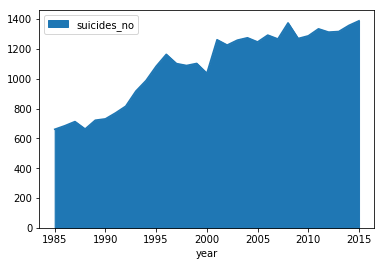

In [9]:
mascbr.plot.area(x='year', y='suicides_no')

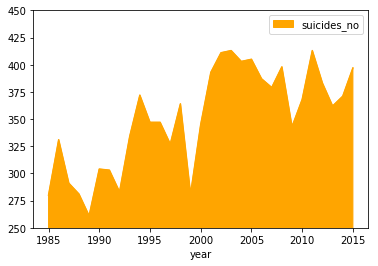

In [10]:
fembr.plot.area(x='year', y='suicides_no', ylim=(250,450), color='orange')

In [11]:
af = pd.merge(mascbr, fembr, how='right', on='year')

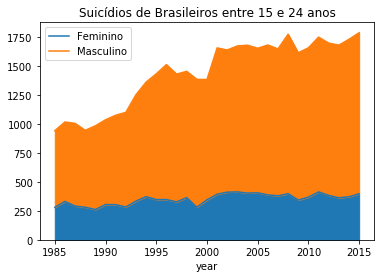

In [15]:
af.plot.area(x='year',y=['suicides_no_y','suicides_no_x'], title='Suicídios de Brasileiros entre 15 e 24 anos').legend(["Feminino", "Masculino"])